# Analysis of centos positioning in Arab Andalusian Music

### 1. Setup

In [73]:
import music21
from music21 import *
import json
import os
import pandas as pd
from IPython.display import display

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
import extract_score_data as esd
import score_data_processing as sdp
import plotting as plot
import statistics_tests as stats

In [20]:
'''
Define paths to folders and files
Define constants
'''

DATA_FILE = 'data/arab-andalusian-scores-lines.json'
FOLDER_PATH = 'data/scores'
SCORES_FOLDER = os.listdir(FOLDER_PATH)
PLOTS_PATH = 'plots'

AMIN_CHACHOO_CENTOS = [['A', 'G', 'F', 'E'], ['B-', 'A', 'G'], ['B', 'D', 'C'], ['C', 'B', 'A', 'G'], ['E', 'F', 'G'], ['F', 'G', 'E', 'F', 'E', 'D', 'C'], ['G', 'A', 'B', 'C']]
TF_IDF_CENTOS = [['G', 'F', 'E'], ['E', 'F', 'G'], ['A', 'G', 'F'], ['F', 'E', 'D'], ['E', 'D', 'C'], ['F', 'E', 'D', 'C'], ['A', 'G', 'F', 'E']]
SIA_CENTOS = [['A', 'G', 'F'], ['D', 'C', 'B'], ['E', 'D', 'C'], ['E', 'E', 'F'], ['E', 'F', 'E'], ['E', 'F', 'G'], ['F', 'E', 'D'], ['F', 'E', 'F']]
MGDP_CENTOS = [['G', 'E', 'F'], ['F', 'G', 'E'], ['B-', 'A', 'G']]

CENTOS_LIST_NAMES = ['Amin Chachoo centos ', 'TF IDF centos ', 'SIA centos ', 'MGPD centos ']

In [5]:
 # Load the JSON data
with open(DATA_FILE, 'r') as json_file:
    data_annotations = json.load(json_file)

### 2. Get data from JSON annotations and prepare it for analysis

In [6]:
'''
Get scores data in a well structured data structure.
'''
scores_data = esd.get_score_data(SCORES_FOLDER, FOLDER_PATH, data_annotations)

In [7]:
'''
UNCOMMENT LINE BELOW IF WANT TO CHECK THE SCORES DATA STRUCTURE
'''
#scores_data

'\nUNCOMMENT LINE BELOW IF WANT TO CHECK THE SCORES DATA STRUCTURE\n'

In [8]:
'''
Add the corresponding music streams into the data structure.
'''
scores_data = esd.add_streams_to_score_data(scores_data)

In [9]:
''' 
Sanity check how many scores are counted within the JSON (should be 5)
'''
len(scores_data) == 5

True

In [ ]:
# sanity check that score parsing worked
scores_data['a451a7fc-c53f-462a-b3fc-4377bb588105']['annotations'][1]['ṣanā`i`'][0]['lines'][0]['sections'][0]['score'].show()

In [11]:
'''
UNCOMMENT LINE BELOW IF WANT TO CHECK THE SCORES DATA STRUCTURE
'''

# scores_data

'\nUNCOMMENT LINE BELOW IF WANT TO CHECK THE SCORES DATA STRUCTURE\n'

You can now see that the equivalent music streams have been added to each sanai and its sections.

In [12]:
# extract full sanai information and sanai scores
all_sanai, all_sanai_scores, all_sanai_lines_scores = esd.process_annotations(scores_data)     

In [13]:
'''
Testing that the parsing of the created data strcuture works by counting the occurrence of sanai, sana, 
lines and sections by getting the count of score sections for each piece of music in the provided scores data.
'''

score_section_counts = esd.calculate_score_section_counts(scores_data)

In [14]:
'''
UNCOMMENT LINE BELOW IF WANT TO CHECK THE SCORES SECTION COUNT DATA STRUCTURE
'''
#score_section_counts

'\nUNCOMMENT LINE BELOW IF WANT TO CHECK THE SCORES SECTION COUNT DATA STRUCTURE\n'

### 3. Count centos positions for all sections of sanai and lines of all data for various centos lists

In [15]:
# NOTE FROM SUVI: how would we feel aobut changing the name of scores in this context to e.g. data_set? As the full dict with all the scores is our 'data set' for the project
# also might make it a bit clearer like datat set vs the scores in the context of the other functions 

'''
Extracting the centos counts of the different key centos of ṭab‘ al-māya identified by Nuttall et. als paper
'''
# counts per sections of sanai and lines
all_amin_chachoo_centos_counts = sdp.count_all_patterns_wrapper(scores_data, AMIN_CHACHOO_CENTOS)
all_tf_idf_centos_counts = sdp.count_all_patterns_wrapper(scores_data, TF_IDF_CENTOS)
all_sia_centos_counts = sdp.count_all_patterns_wrapper(scores_data, SIA_CENTOS)
all_mgdp_centos_counts = sdp.count_all_patterns_wrapper(scores_data, MGDP_CENTOS)

In [35]:
'''
UNCOMMENT LINE BELOW IF WANT TO CHECK THE CENTOS COUNT DATA STRUCTURE
'''
# all_sia_centos_counts

'\nUNCOMMENT LINE BELOW IF WANT TO CHECK THE CENTOS COUNT DATA STRUCTURE\n'

In [36]:
# testing that the count_pattern_in_score function works as intended

first_sana = all_sanai_scores[0]
example_cento = AMIN_CHACHOO_CENTOS[0]
first_quarter_count, middle_count, last_quarter_count = sdp.count_pattern_in_score(first_sana, example_cento)

In [37]:
first_quarter_count, middle_count, last_quarter_count

(4, 9, 2)

### 4. Count centos positions for all sanai and lines of all data for various centos lists for each score

In [52]:
'''
Count the cumulative distribution of centos for different sanai of the different scores.
'''
# Get the mizans for each file in the dataset (for naming plots)
scores_mizans_dict = esd.get_mizans_of_scores(scores_data)
# Get centos counts
centos_counts = [all_amin_chachoo_centos_counts, all_tf_idf_centos_counts, all_sia_centos_counts, all_mgdp_centos_counts]

cumulative_sanai_centos_positions_per_score, cumulative_line_centos_positions_per_score = sdp.get_centos_counts_per_tab_mizan_score(centos_counts, scores_mizans_dict)


In [53]:
'''
Uncomment the following lines to display tables with the counts for each tab-mizan score. 
'''
# print('SANAI LEVEL:')
# for centos_list in cumulative_sanai_centos_positions_per_score:
#     print(centos_list)
#     display(cumulative_sanai_centos_positions_per_score[centos_list].style)

# print('\nLINE LEVEL')
# for centos_list in cumulative_line_centos_positions_per_score:
#     print(centos_list)
#     display(cumulative_line_centos_positions_per_score[centos_list].style)


'\nUncomment the following lines to display tables with the counts for each tab-mizan score. \n'

### 5. Count distribution by different centos lists (e.g. Amin Chachoo centos and TF IDF centos) across all the scores

In [54]:
sanai_distribution_per_centos_list = sdp.count_distribution_over_dataset(cumulative_sanai_centos_positions_per_score)
lines_distribution_per_centos_list = sdp.count_distribution_over_dataset(cumulative_line_centos_positions_per_score)

In [96]:
'''
Uncomment the following lines to display tables with the counts for each centos list. 
'''
# print('SANAI LEVEL:')
# for centos_list in sanai_distribution_per_centos_list:
#     print(centos_list)
#     display(sanai_distribution_per_centos_list[centos_list].style)

# print('\nLINE LEVEL')
# for centos_list in lines_distribution_per_centos_list:
#     print(centos_list)
#     display(lines_distribution_per_centos_list[centos_list].style)

'\nUncomment the following lines to display tables with the counts for each centos list. \n'

### 6. Calculate normalized position counts throughout entire dataset: all centos, all centos lists 

In [64]:
sanai_combined = sdp.combine_normalized_position_counts(sanai_distribution_per_centos_list)
lines_combined = sdp.combine_normalized_position_counts(lines_distribution_per_centos_list)

### 7. Plot the overall distribution of the centos in each centos list. 

In [60]:
'''
Plot the overall distribution of the centos in each centos list.

Modify the value of flags below if you wish to view specific graphs and if you wish to save graphs.
PLOT_DATA_DISTR_PER_SCORE_AND_CENTOS_LIST: plot all detail of different centos distribution for each score (5 scores in total)
                                           allows analysis of how distribution changes over mizans
PLOT_ALL_DATA_DISTR_PER_CENTOS_LIST: plot only the combined counts per centos list (combine data across scores)
                                     allows easier analysis of how distribution varies between centos lists
PLOT_OVERALL_TREND: plot overall trends for entire dataset (combine all centos, centos lists and normalize to visualise general trend)
                    allows easy visualisation of overall trend of centos positioning distribution over the entire dataset
SAVE_PLOTS: trigger whether plots are saved to a folder as well as shown in the notebook
'''

PLOT_DATA_DISTR_PER_SCORE_AND_CENTOS_LIST = False
PLOT_ALL_DATA_DISTR_PER_CENTOS_LIST = True
PLOT_OVERALL_TREND = True

SAVE_PLOTS = False

In [61]:
#plot distribution withi each score and centos lists 

if PLOT_DATA_DISTR_PER_SCORE_AND_CENTOS_LIST == True:
    print("SANAI LEVEL:")
    for centos_list in cumulative_sanai_centos_positions_per_score:
        print(centos_list)
        plot.plot_centos_distribution(cumulative_sanai_centos_positions_per_score[centos_list], centos_list)

    print("LINE LEVEL:")
    for centos_list in cumulative_line_centos_positions_per_score:
        print(centos_list)
        plot.plot_centos_distribution(cumulative_line_centos_positions_per_score[centos_list], centos_list)

SANAI LEVEL:


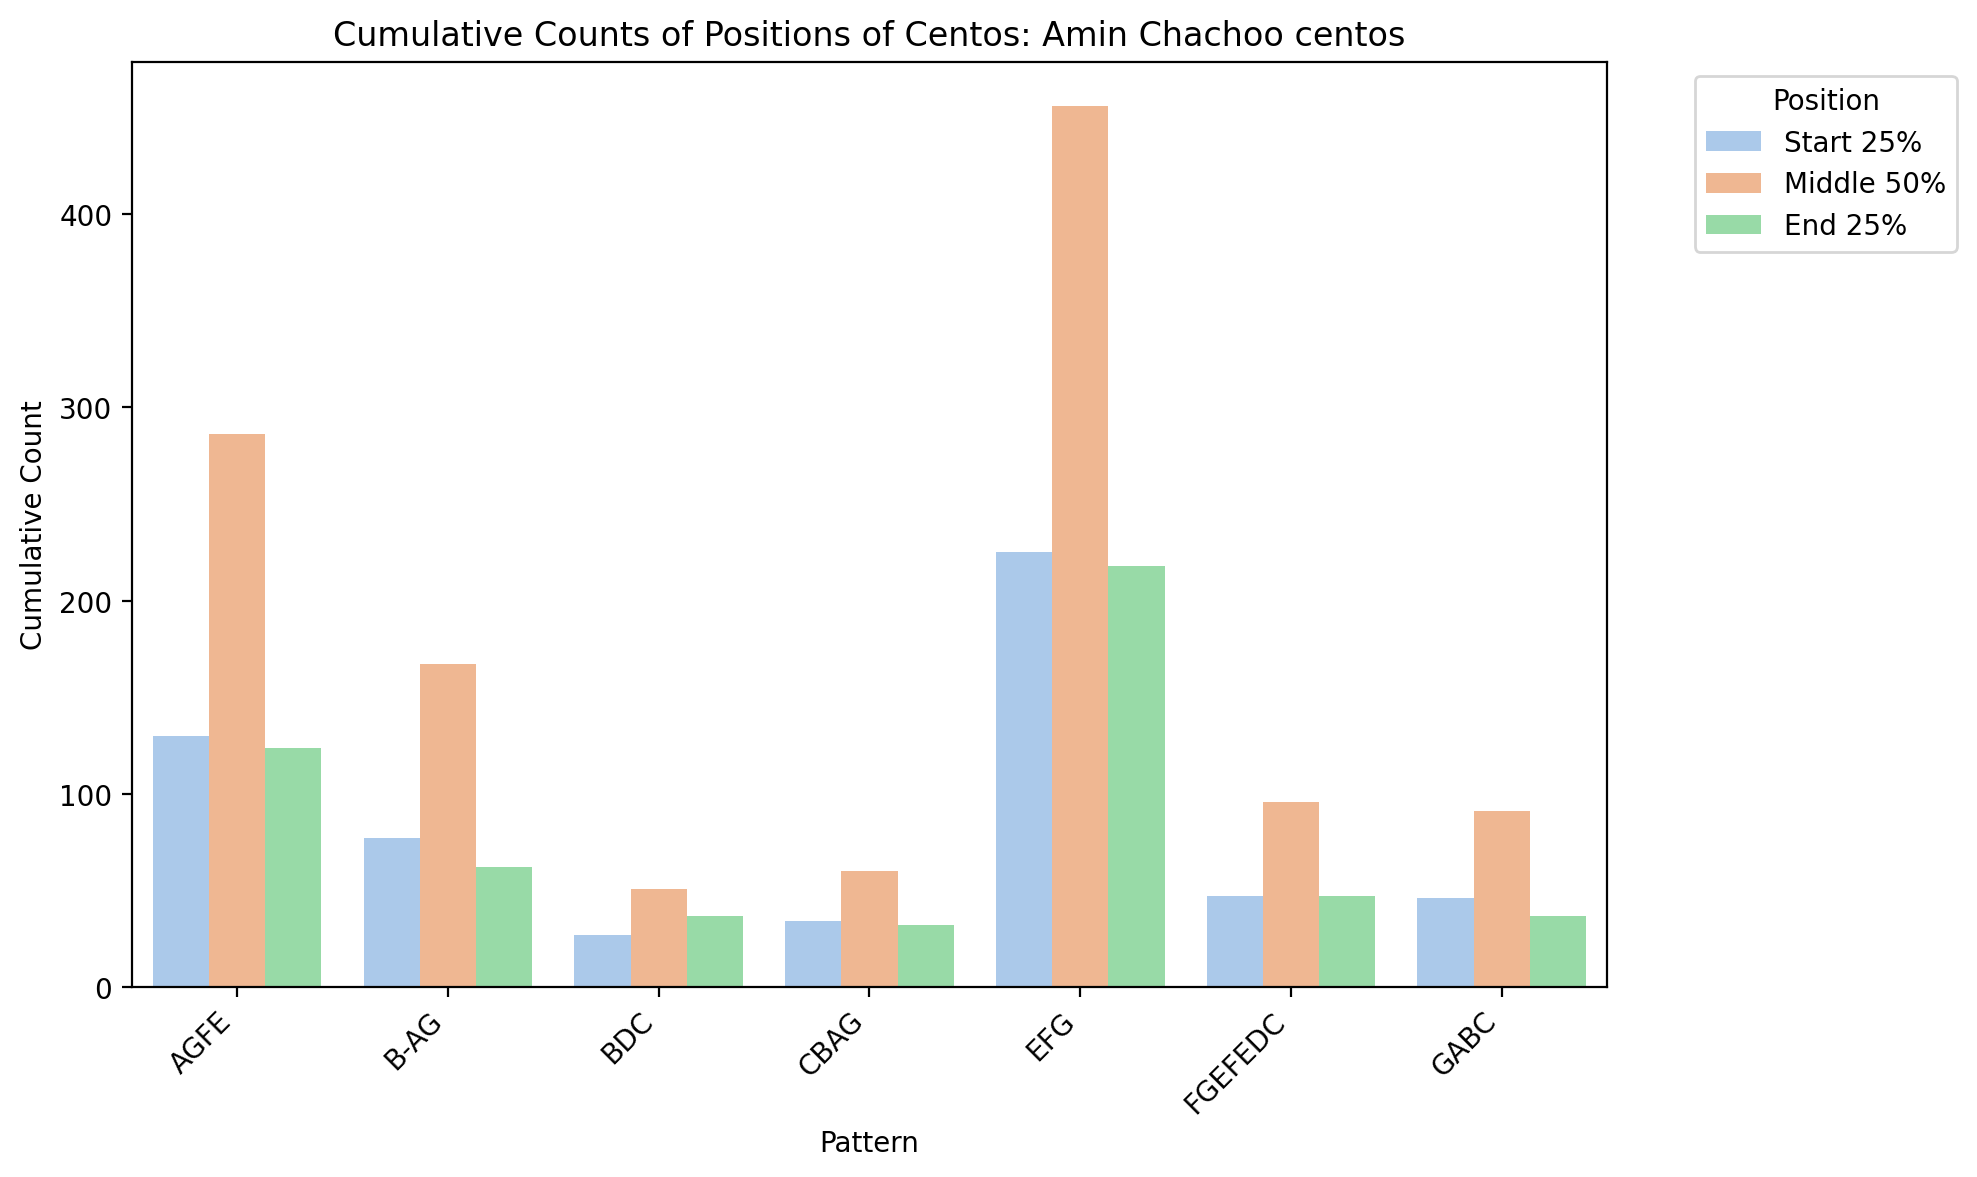

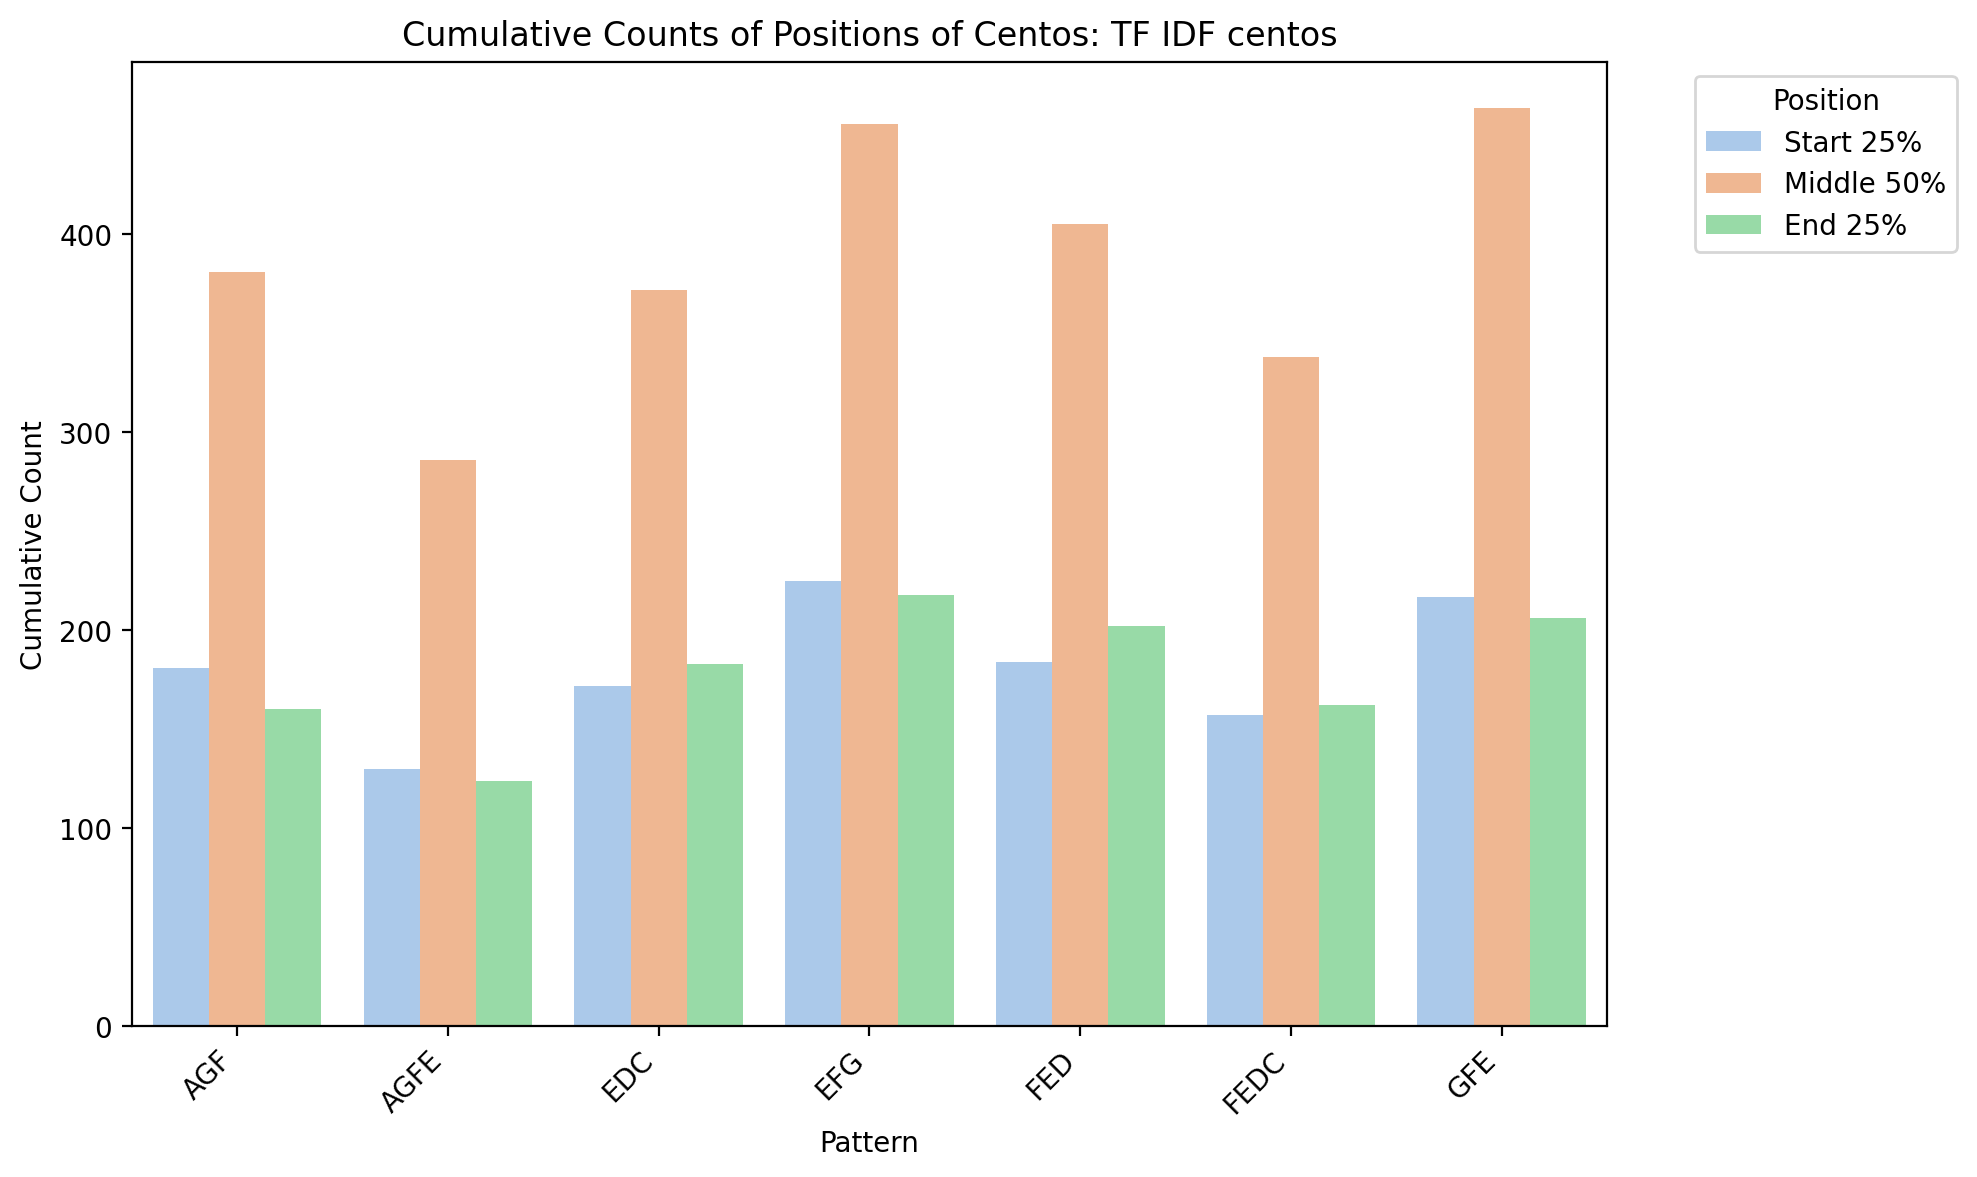

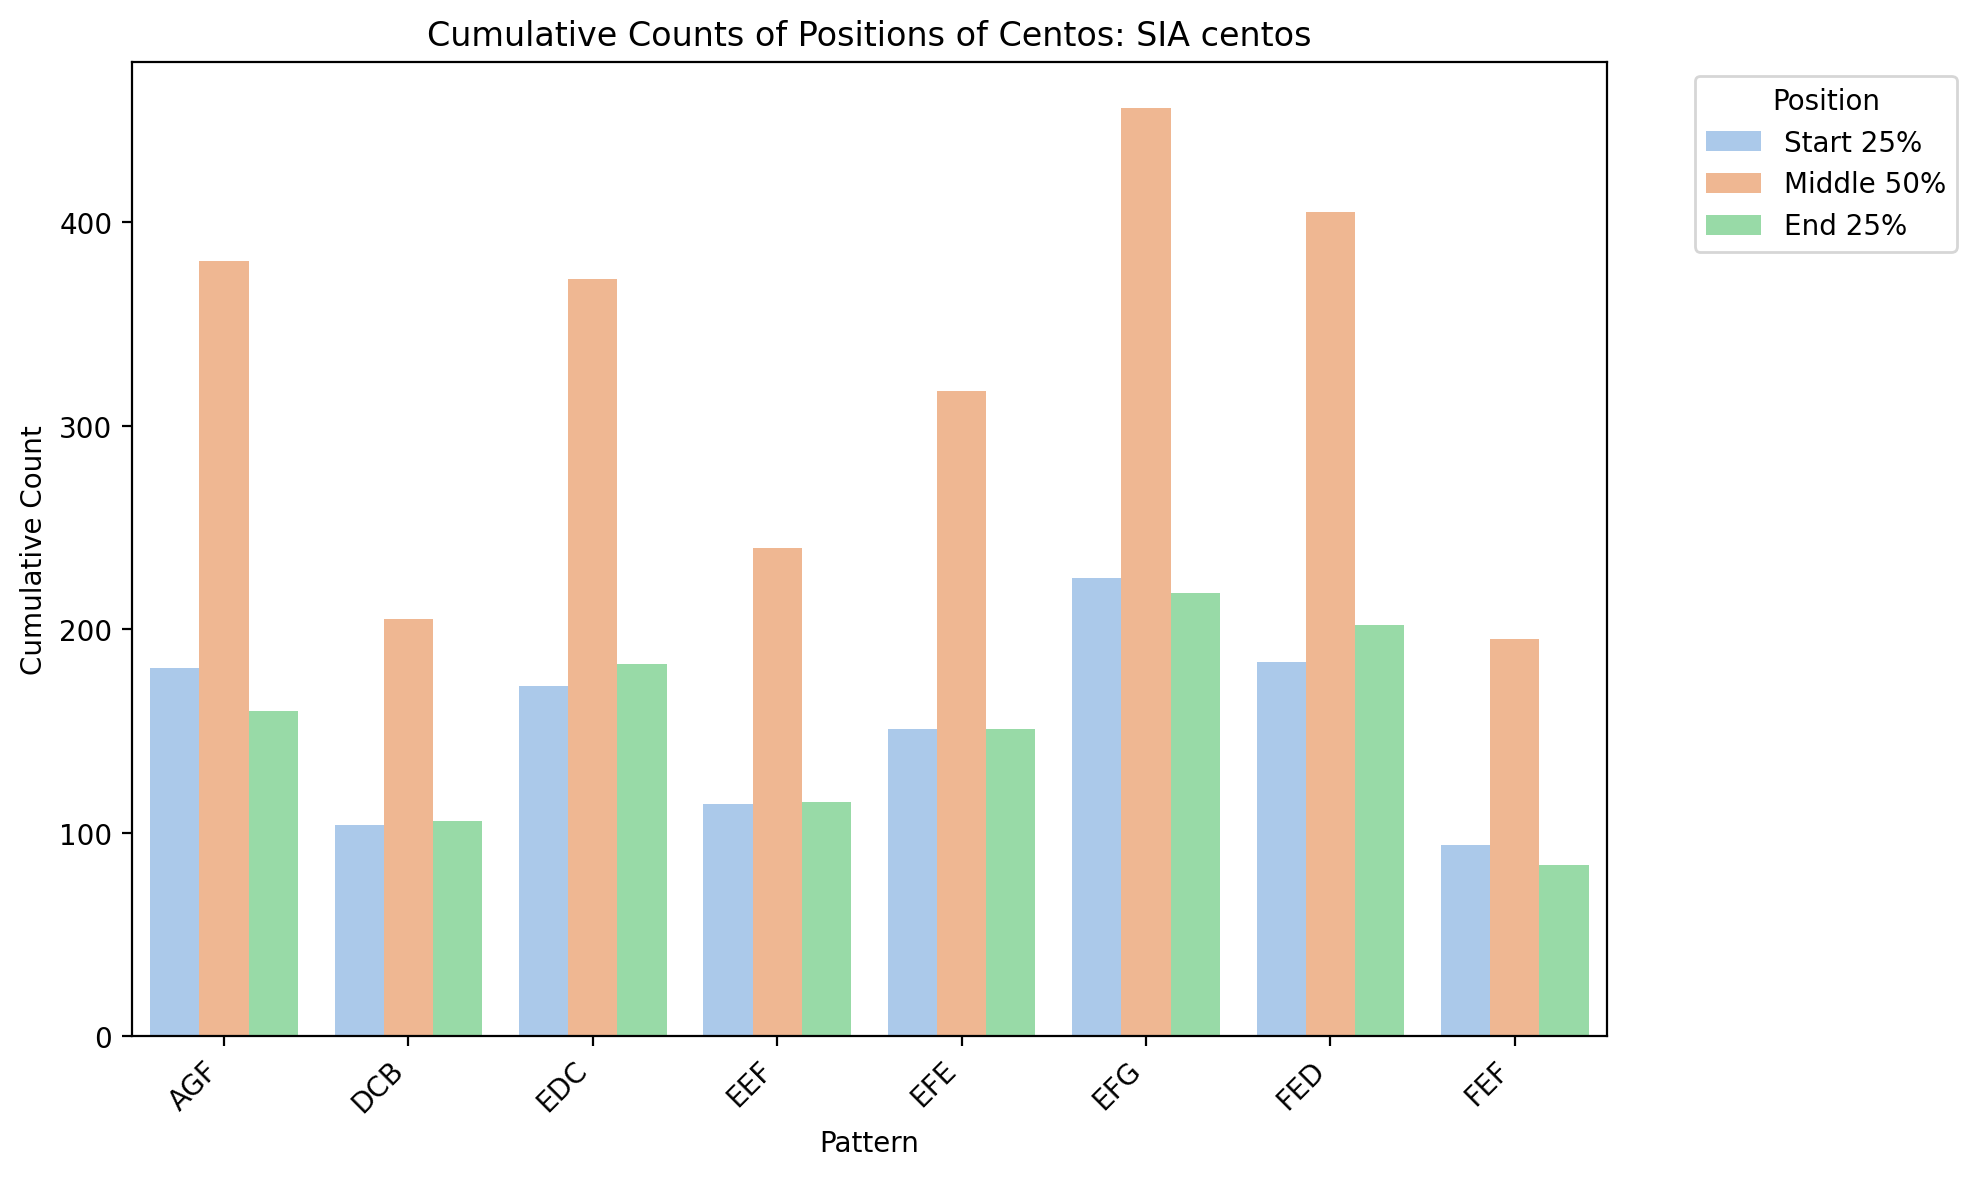

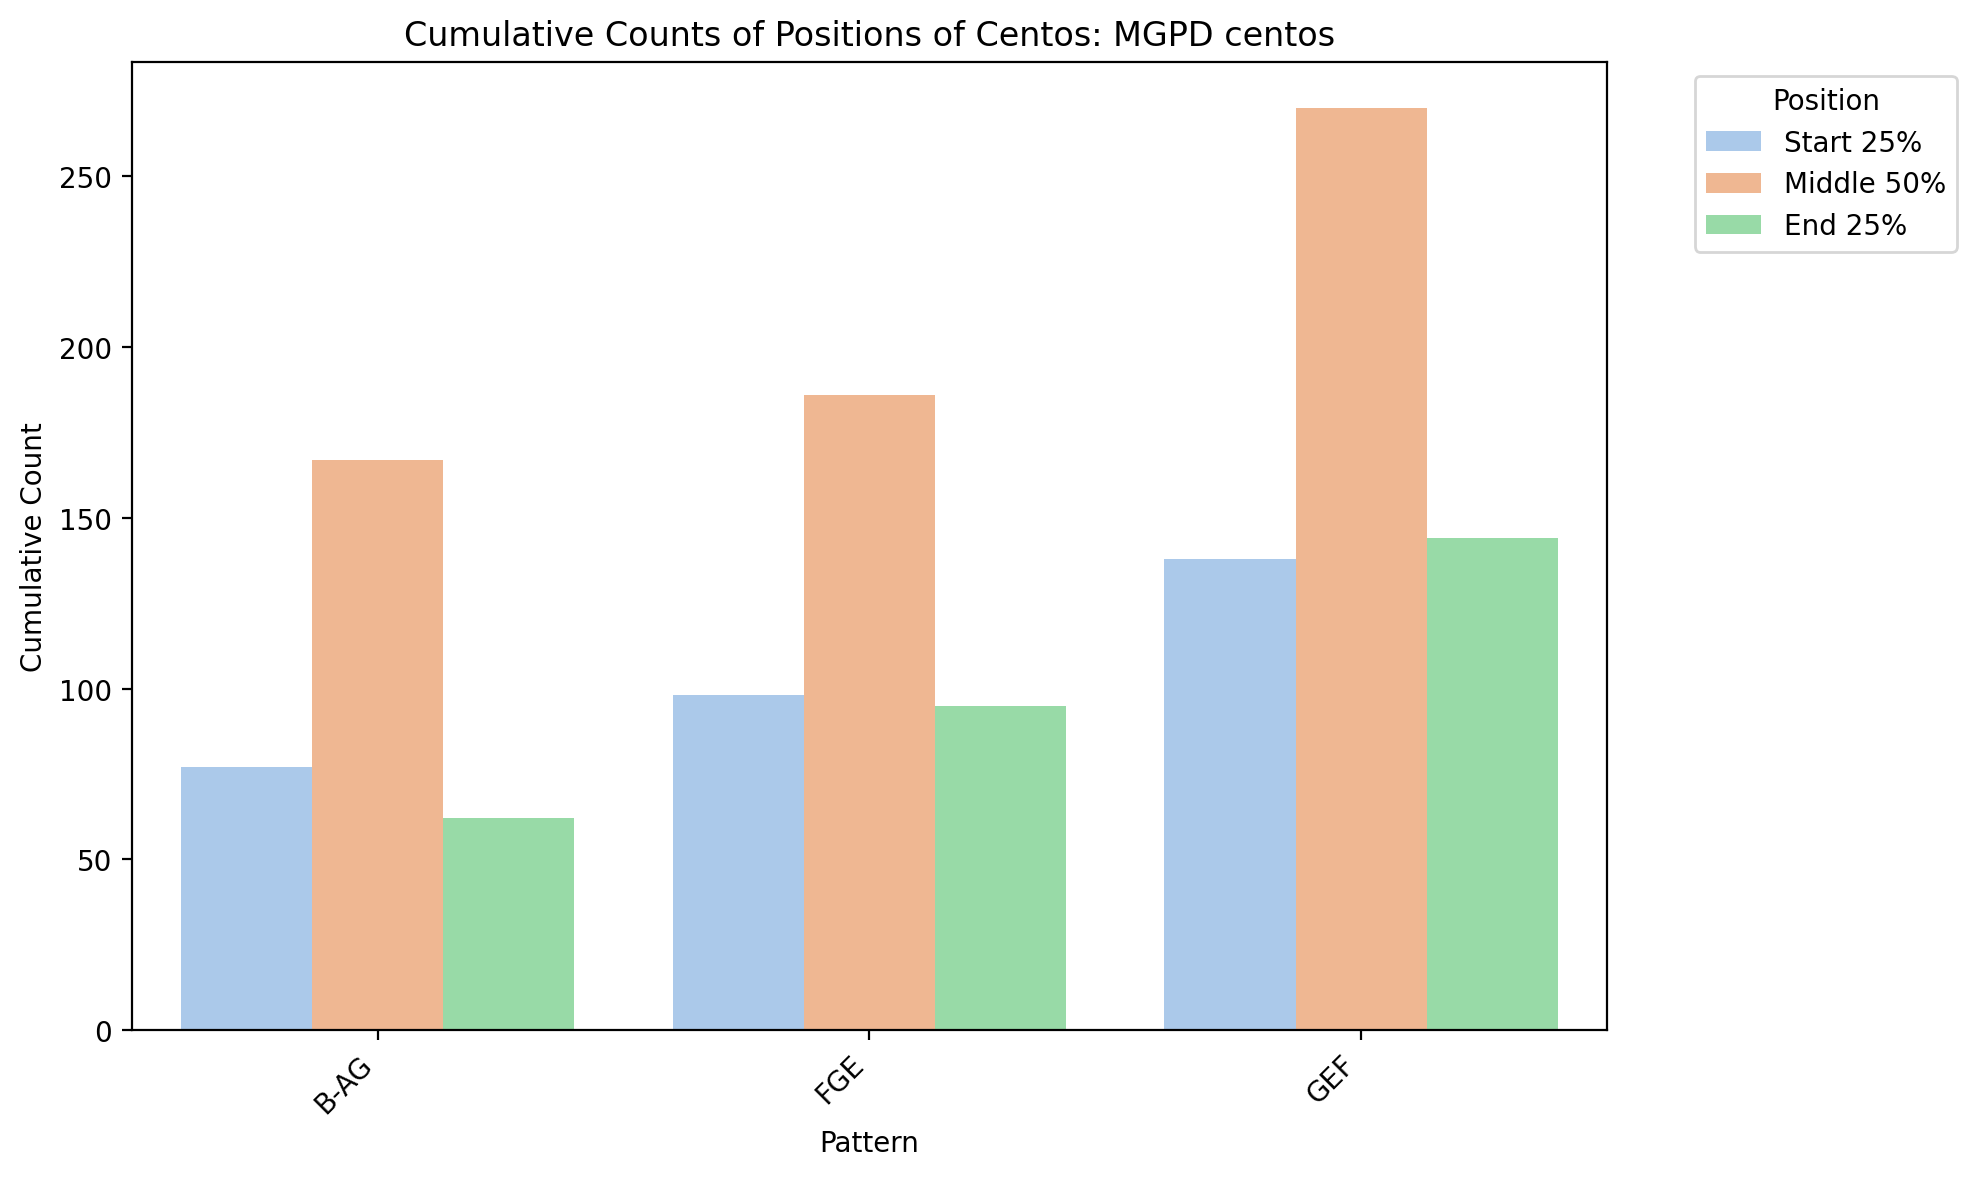

LINE LEVEL:


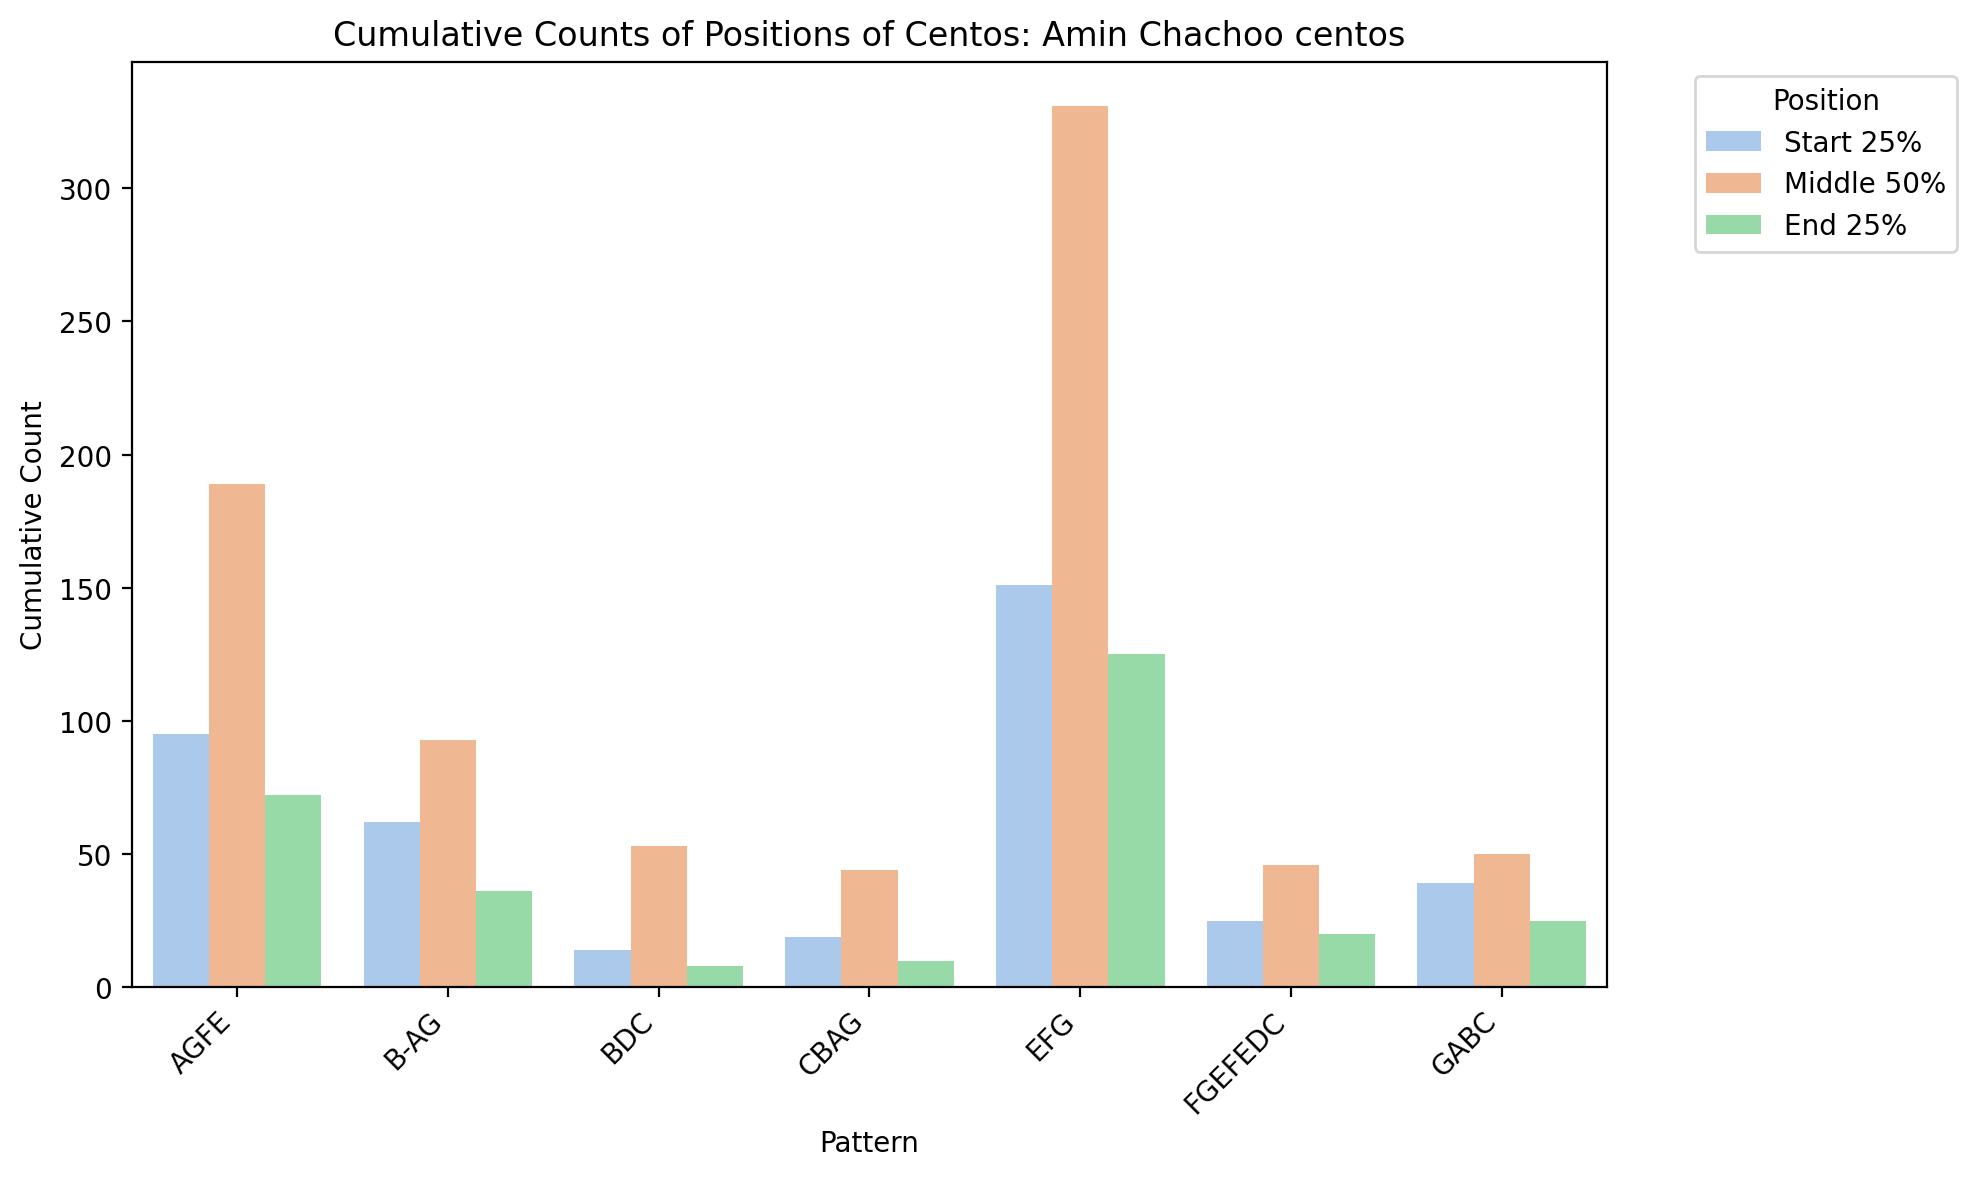

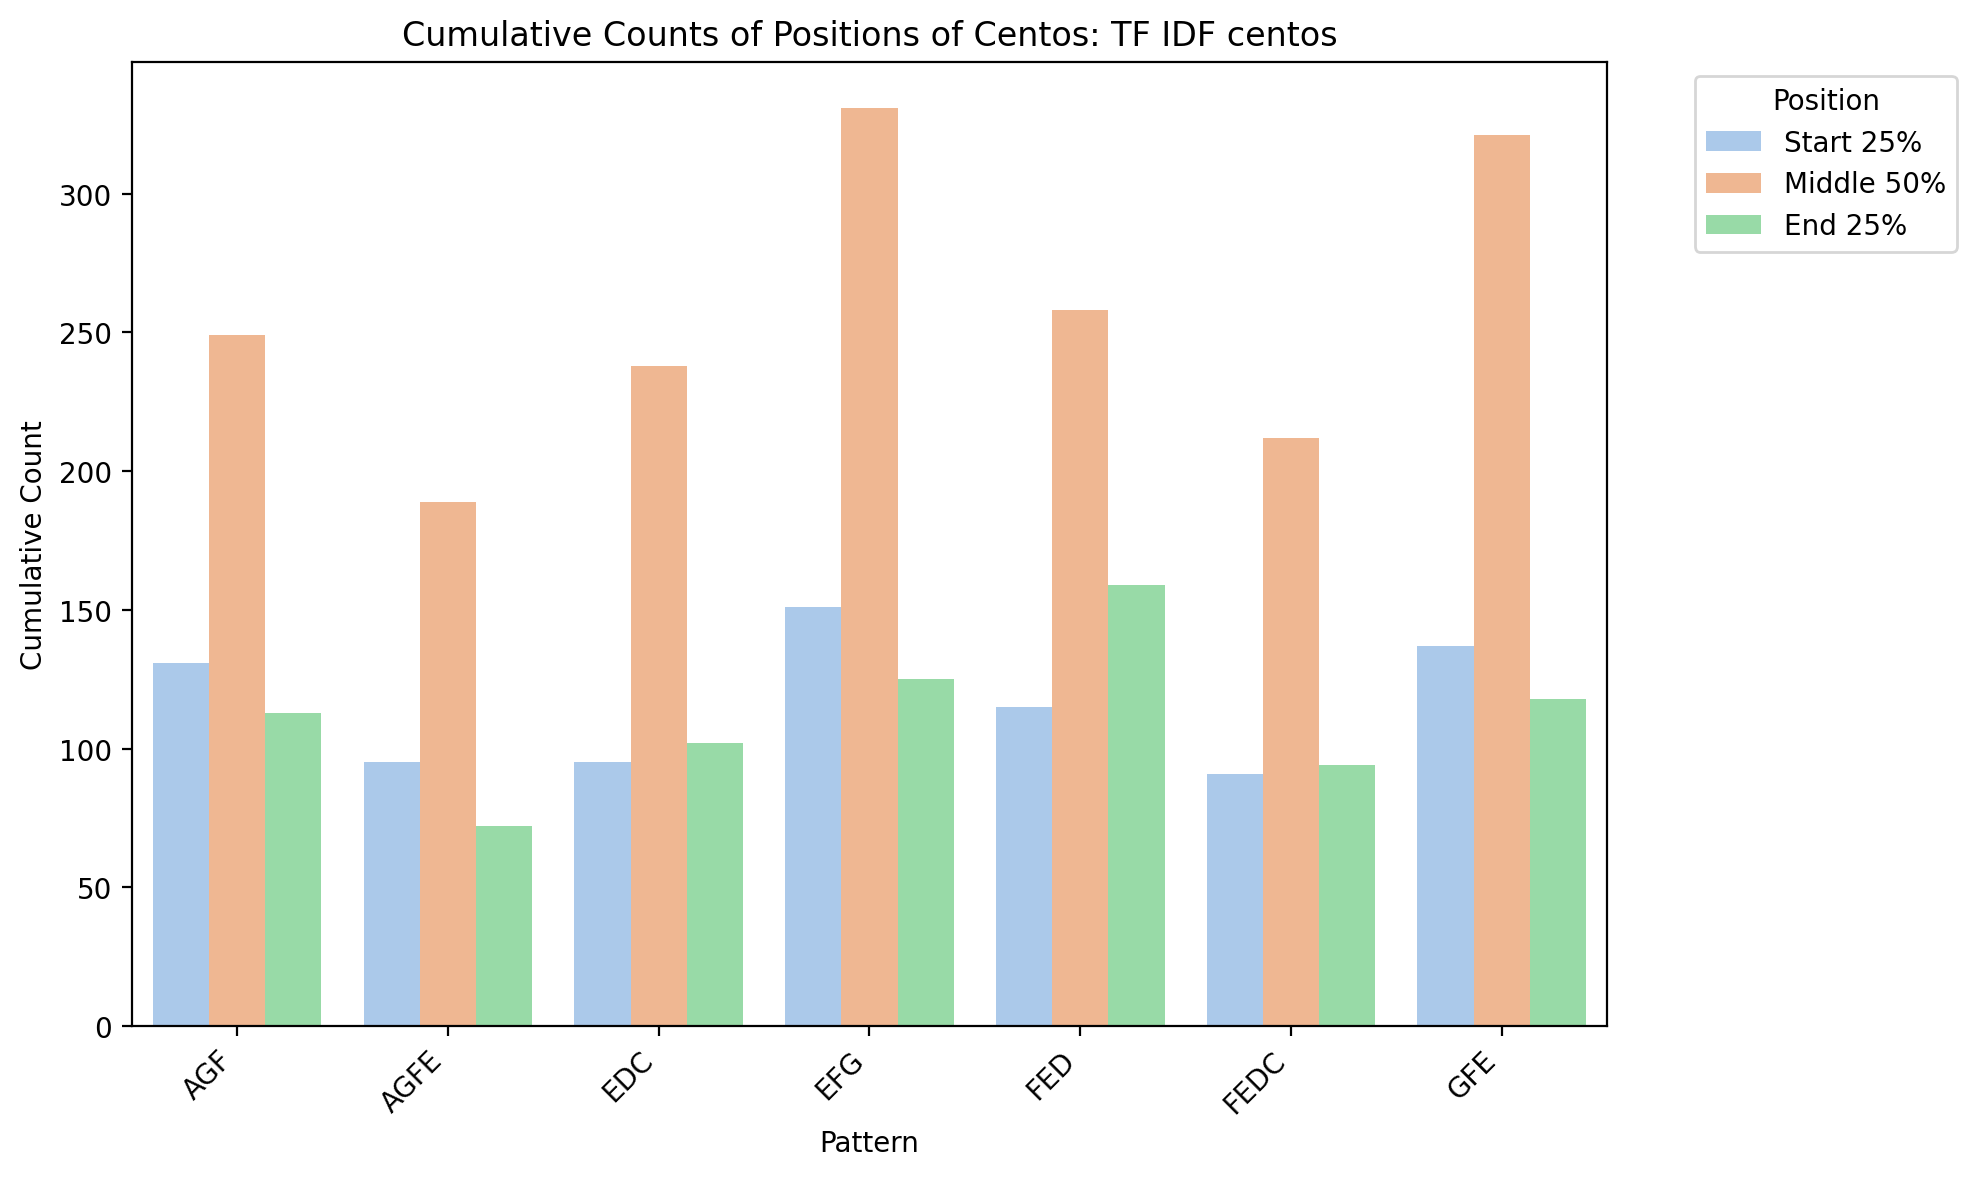

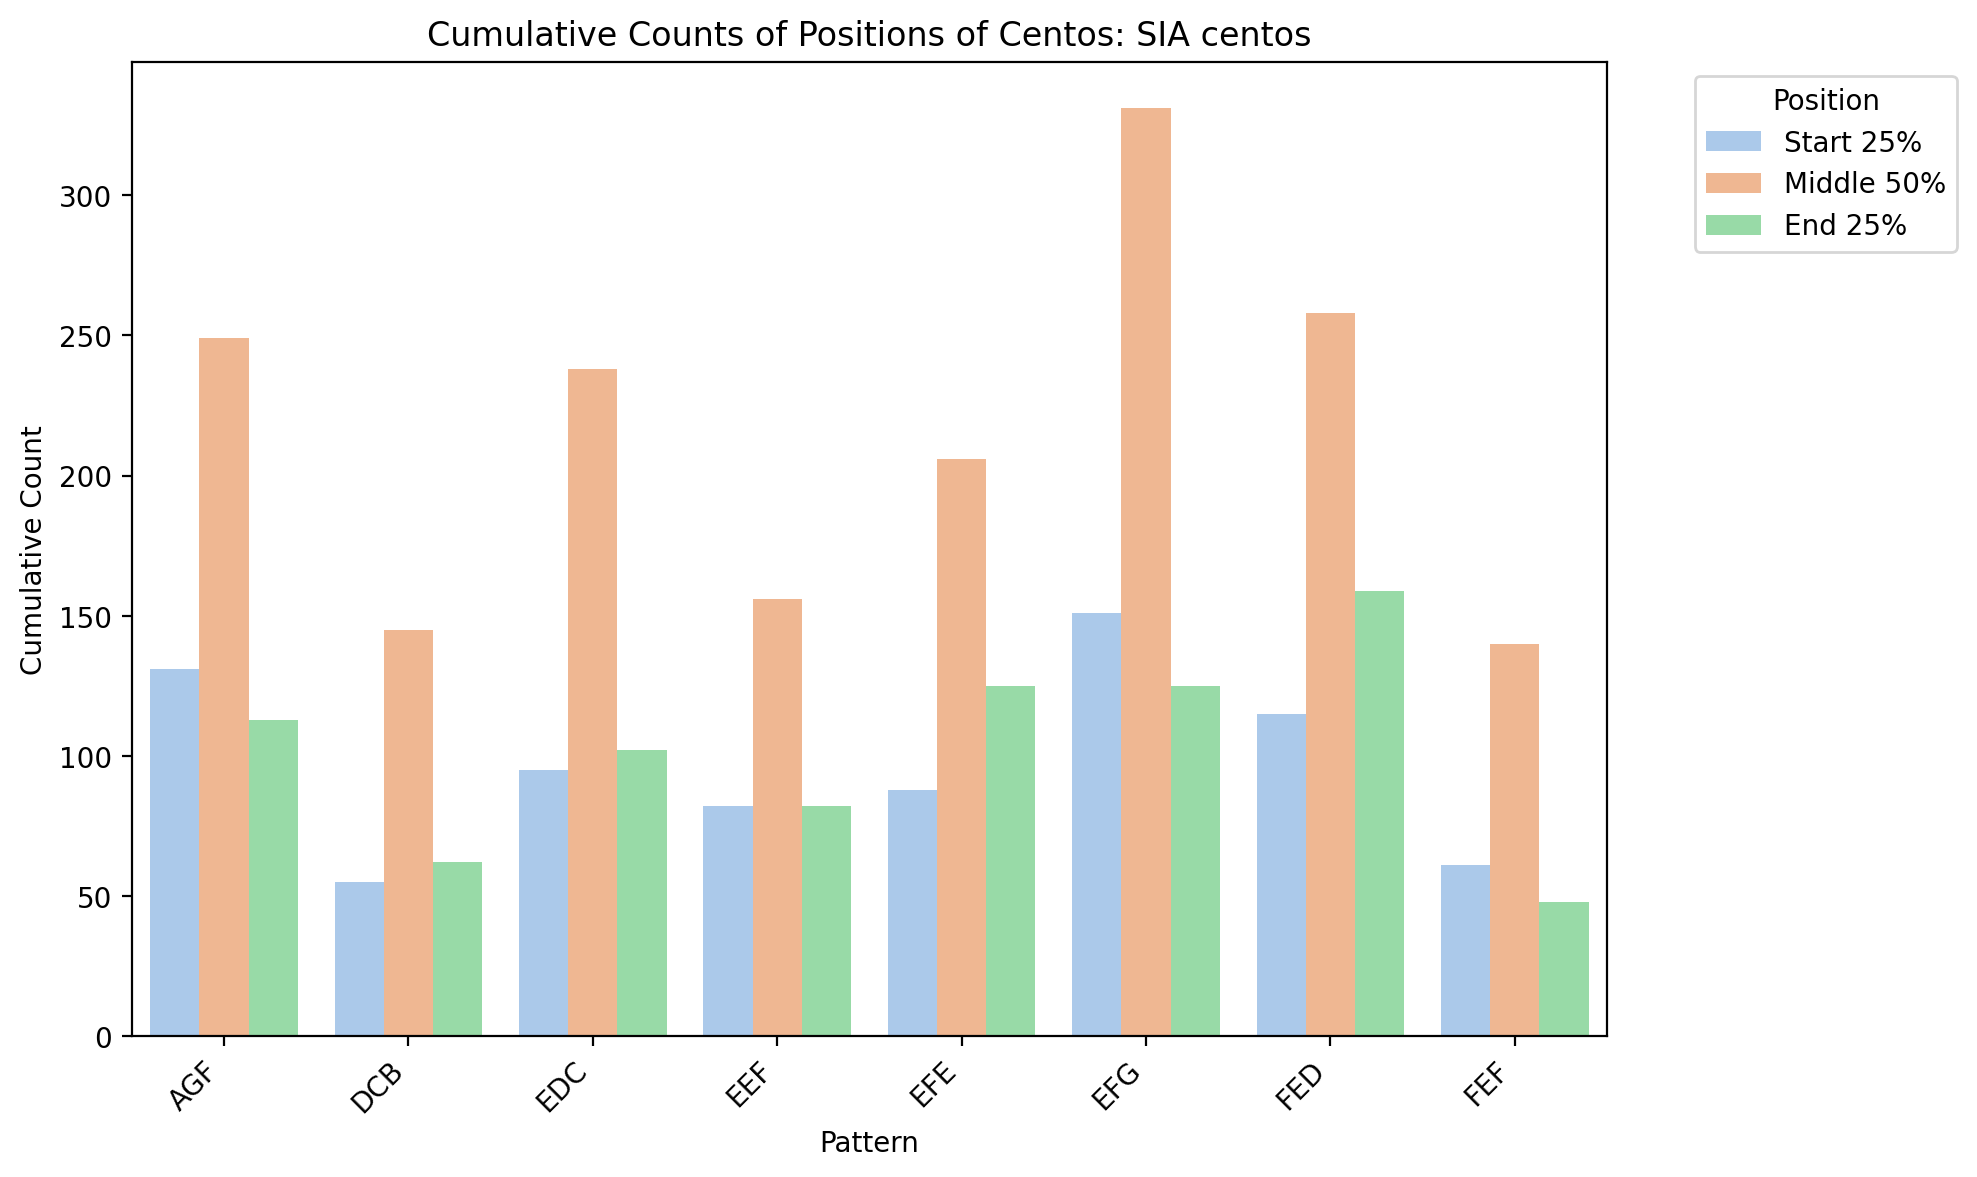

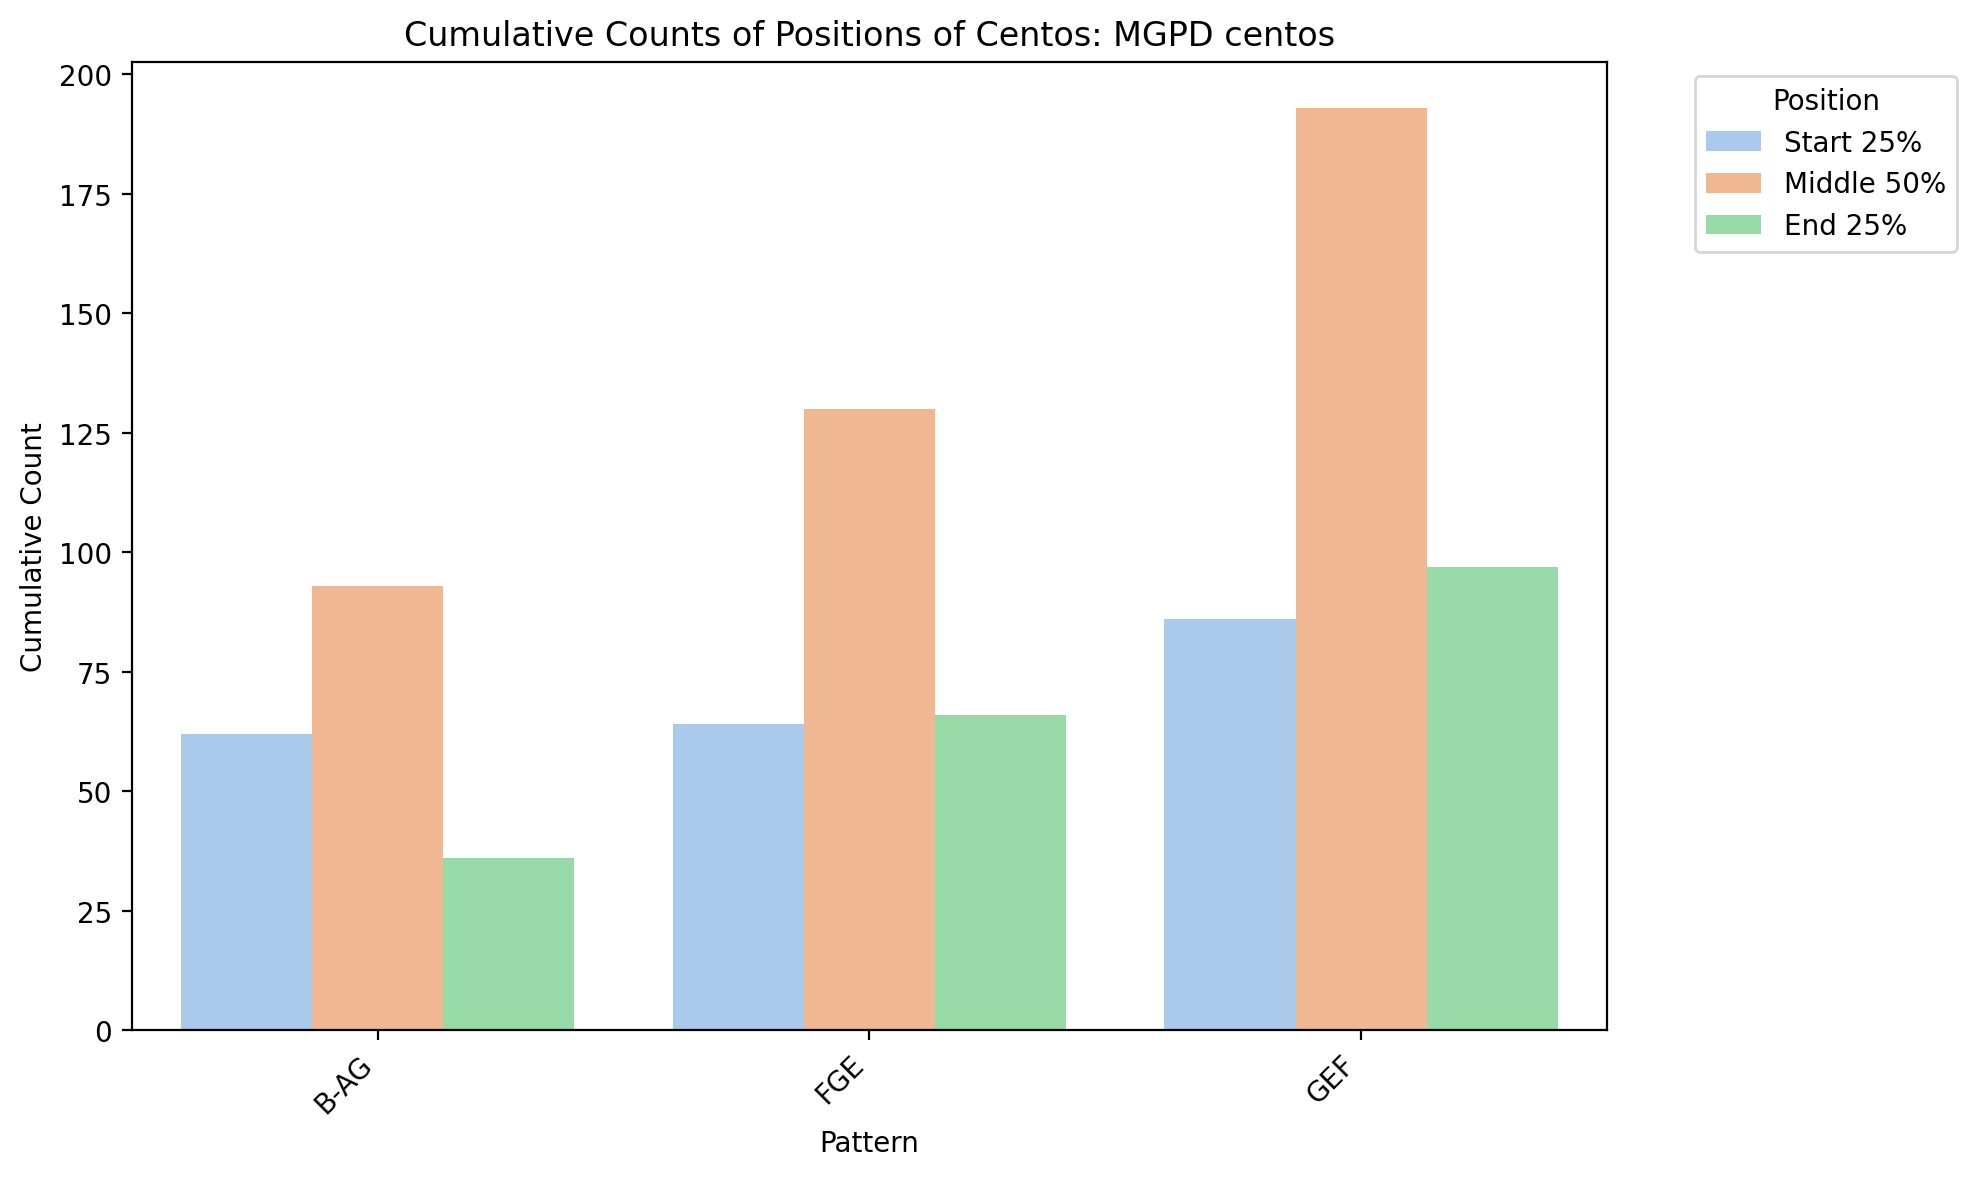

In [62]:
#plot distribution over centos lists 

if PLOT_ALL_DATA_DISTR_PER_CENTOS_LIST == True:
    print("SANAI LEVEL:")
    for centos_list in sanai_distribution_per_centos_list:
        plot.plot_centos_distribution(sanai_distribution_per_centos_list[centos_list], centos_list)

    print("LINE LEVEL:")
    for centos_list in lines_distribution_per_centos_list:
        plot.plot_centos_distribution(lines_distribution_per_centos_list[centos_list], centos_list)

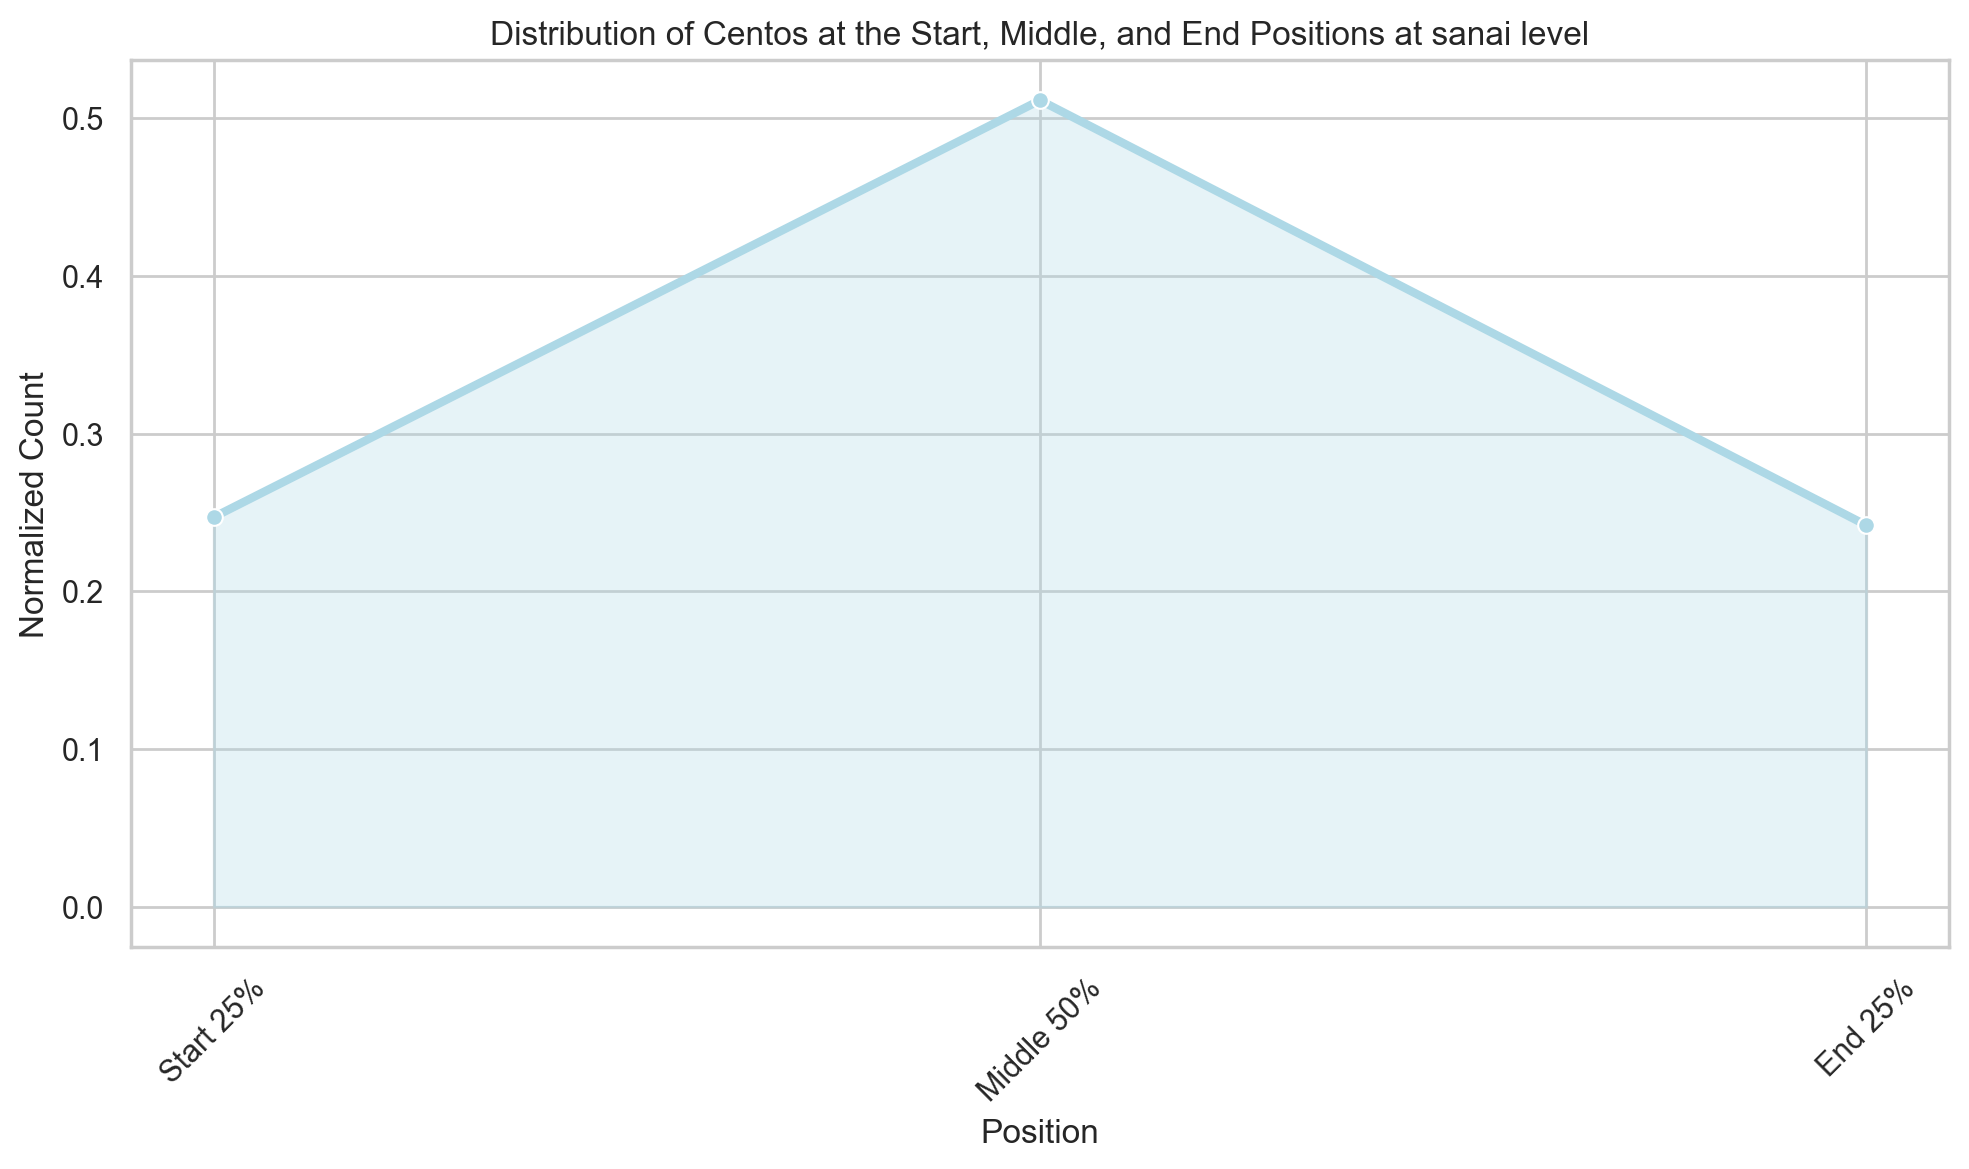

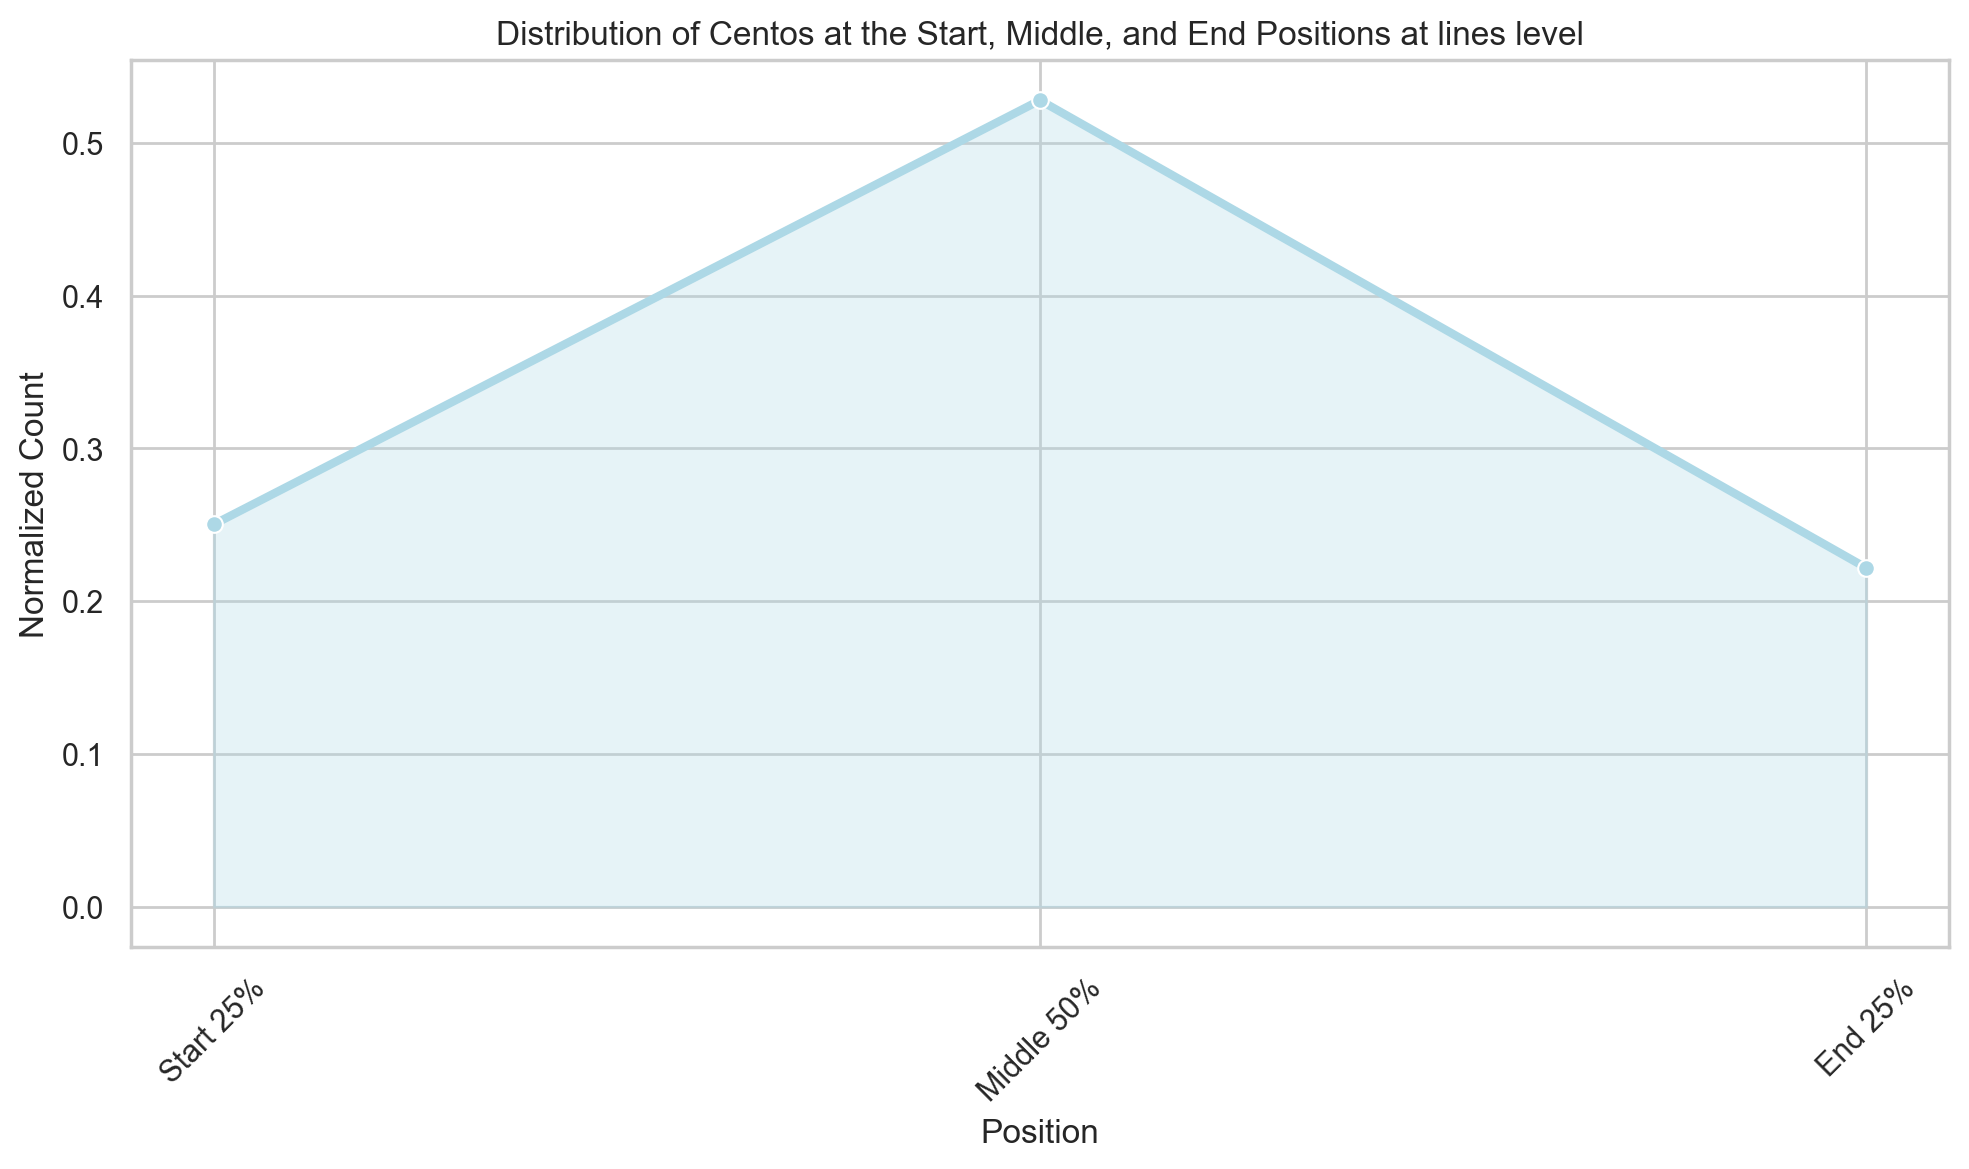

In [63]:
#plot overall trend
if PLOT_OVERALL_TREND == True:
    plot.plot_complete_distribution_trend(sanai_combined, 'sanai')
    plot.plot_complete_distribution_trend(lines_combined, 'lines')

### 8. Calculate and display statistical significance

In [81]:
'''
Modify this flag to toggle between whether dataframes of statistical significance in all cases are displayed or not.
'''

DISPLAY_STAT_SIG = False

In [92]:
sanai_chi_sq = {}
line_chi_sq = {}

print("Pure Chi Squared")
print("SANAI LEVEL:")
for centos_list in sanai_distribution_per_centos_list:
    sanai_chi_sq[centos_list] = stats.chi_squared_test(sanai_distribution_per_centos_list[centos_list])
    if DISPLAY_STAT_SIG:
        display(sanai_chi_sq[centos_list].style)

sanai_chi_sq_significance = stats.count_significance(sanai_chi_sq)
display(sanai_chi_sq_significance.style)

print("LINE LEVEL:")
for centos_list in lines_distribution_per_centos_list:
    line_chi_sq[centos_list] = stats.chi_squared_test(lines_distribution_per_centos_list[centos_list])
    if DISPLAY_STAT_SIG:
        display(line_chi_sq[centos_list].style)

line_chi_sq_significance = stats.count_significance(line_chi_sq)
display(line_chi_sq_significance.style)

Pure Chi Squared
SANAI LEVEL:


,Centos_List,Average_Significance
0,Amin Chachoo centos,0.000000
1,TF IDF centos,0.000000
2,SIA centos,0.000000
3,MGPD centos,0.000000


LINE LEVEL:


,Centos_List,Average_Significance
0,Amin Chachoo centos,0.000000
1,TF IDF centos,0.000000
2,SIA centos,0.000000
3,MGPD centos,0.000000


As the chi-squared test suggests that the results are not statistically significant, further statsistical tests were carried out for further analysis of the results.

In [93]:
sanai_mcnemar = {}
lines_mcnemar = {}

print("\nMcNemar Test")
print("SANAI LEVEL:")
for centos_list in sanai_distribution_per_centos_list:
    sanai_mcnemar[centos_list] = stats.mcnemar_test(sanai_distribution_per_centos_list[centos_list])
    if DISPLAY_STAT_SIG:
        display(sanai_mcnemar[centos_list].style)

sanai_mcnemar_significance = stats.count_significance(sanai_mcnemar)
display(sanai_mcnemar_significance.style)

print("\nLINE LEVEL:")
for centos_list in lines_distribution_per_centos_list:
    lines_mcnemar[centos_list] = stats.mcnemar_test(lines_distribution_per_centos_list[centos_list])
    if DISPLAY_STAT_SIG:
        display(lines_mcnemar[centos_list].style)

lines_mcnemar_significance = stats.count_significance(sanai_mcnemar)
display(lines_mcnemar_significance.style)



McNemar Test
SANAI LEVEL:


,Centos_List,Average_Significance
0,Amin Chachoo centos,0.857143
1,TF IDF centos,1.000000
2,SIA centos,1.000000
3,MGPD centos,1.000000



LINE LEVEL:


,Centos_List,Average_Significance
0,Amin Chachoo centos,0.857143
1,TF IDF centos,1.000000
2,SIA centos,1.000000
3,MGPD centos,1.000000


#### notes on the statistical significance tests

The results of pure chi-squared test suggest no statistical significance, while McNemar's test suggests there is, which might seem contradictory. However, it's essential to understand that these tests operate under different assumptions and are sensitive to different aspects of the data.

McNemar's test is specifically designed to assess changes or differences in paired nominal data. It's commonly used when comparing observations from the same subjects (or items) across two conditions or time points. McNemar's test is sensitive to changes within pairs, which can occur even with small sample sizes.

On the other hand, the chi-squared test is a more general test of independence between categorical variables. It evaluates whether there is a significant association between two categorical variables, regardless of whether they are paired or independent. It's possible for the chi-squared test to fail to detect significance in paired data if the differences within pairs are not substantial enough to influence the overall association.

In cases where McNemar's test suggests significance while the chi-squared test does not, it's essential to consider the nature of the data and the specific research question you're investigating. If McNemar's test is theoretically more appropriate for your study design and hypothesis, and if it aligns better with your understanding of the data generation process, then its results may be more informative. However, it's always essential to interpret the results within the context of your study and consider the limitations and assumptions of the statistical tests used.